In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from __future__ import print_function, absolute_import, division

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from GomokuBoard import GomokuBoard
from Heuristics import Heuristics
from GomokuTools import GomokuTools as gt
from HeuristicPolicy import HeuristicGomokuPolicy

In [5]:
from google.cloud import bigquery
import google.datalab.bigquery as bq

In [6]:
%load_ext google.cloud.bigquery

In [7]:
A,B,C,D,E,F,G,H,I, J, K, L, M, N, O, P, Q, R, S, T, U = \
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
BLACK, WHITE, EDGES = 0,1,2

from [Yixin vs Rudolf Dupszki](https://www.aiexp.info/ai-vs-human-gomoku-2.html), we have a nice threat sequence:

- Round1: Swap2, two more, +, Yixin white. 
- Round2: Swap2, two more, +, Yixin black.

In [8]:
# Round 1
# stones=gt.string_to_stones('l13k12m11n14o13k11j12k13k10j10i9j9j8k7h11l8i11m9n10m7l9l7n7m8m6k6n9n6k9i7j7k5')
# Round 2
stones=gt.string_to_stones('e10g8g5f5f6e7f7f8e8g9h10d9g10f10h8h9i9g7e9j8h11i12e11e12g11f11f12e13g13h14i10g14j9k8i8k4i7')

In [9]:
b = GomokuBoard(heuristics=Heuristics(kappa=3), N=20, stones=stones, disp_width=10)

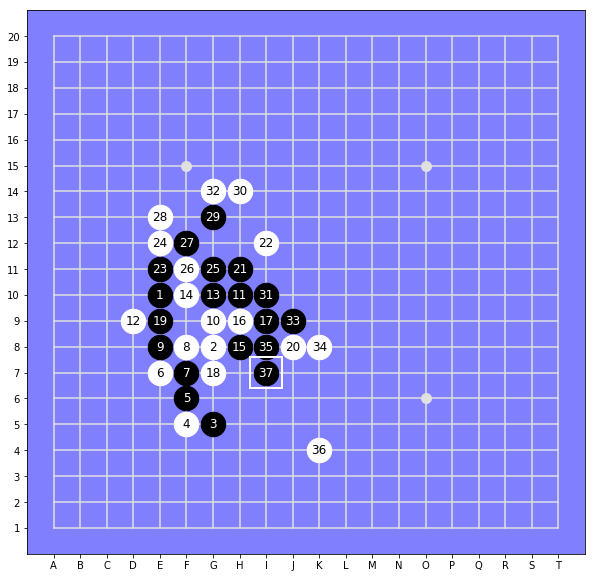

In [10]:
b.display()

# Reading psq files

In [11]:
file = open("games/0_0_8_2.psq", "r")
lines = [l.strip().split(',') for l in file]
stones = [(chr(64+int(x)), int(y)) for x,y,_ in lines[1:-4]]

In [12]:
print(stones)

[('J', 20), ('K', 20), ('J', 19), ('K', 19), ('J', 18), ('K', 18), ('J', 17), ('K', 17), ('K', 16), ('J', 16), ('M', 16), ('I', 15), ('H', 14), ('L', 15), ('H', 13), ('K', 15), ('J', 15), ('I', 14), ('L', 14), ('M', 17), ('I', 13), ('L', 18), ('M', 19), ('N', 18), ('L', 16), ('N', 16), ('O', 15), ('N', 17), ('N', 19), ('O', 17), ('L', 17), ('M', 18), ('O', 18), ('P', 17), ('Q', 17), ('N', 15), ('N', 14), ('O', 16), ('L', 19), ('M', 14), ('L', 13), ('Q', 18)]


In [13]:
b = GomokuBoard(heuristics=Heuristics(kappa=3), stones=stones, disp_width=10, N=20)

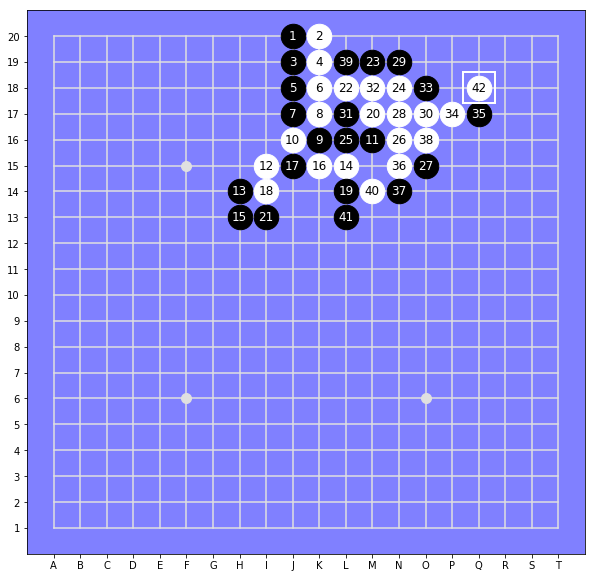

In [14]:
b.display()

---
# Gomocup 2018 data for upload to GCP

In [15]:
def read_psq(filename):
    file = open(filename, "r")

    blob=file.read()
    lines=blob.split("\n")
    blob = blob.replace(",",";")

    head = lines[0]
    game = lines[1:-5]
    tail = lines[-5:]

    coords = [m.split(',') for m in game]
    stones = [(chr(int(x)+64),int(y)) for x,y,_ in coords]
    game = gt.stones_to_string(stones)    
    
    headers = [w.strip() for w in head.split(",")]

    filetype, dimensions=headers[0].split()

    assert(filetype=="Piskvorky")
    
    dim_x, dim_y = dimensions.split('x')
    dim_x, dim_y = int(dim_x), int(dim_y)

    h3, h4 = headers[1:]

    player1, player2 = tail[:2]

    t3=tail[2]
    t4, tournament = tail[3].split(",")

    return {
        'filetype': filetype,
        'dim_x': dim_x,
        'dim_y': dim_y,
        'h3': h3,
        'h4': h4,
        'player1': player1,
        'player2': player2,
        'game': game,
        't3': t3,
        't4': t4,
        'tournament': tournament,
        'blob': blob
    }

In [16]:
res = read_psq("games/0_0_1_2.psq")
res

{'blob': 'Piskvorky 20x20; 11:11; 0\n10;20;0\n11;20;0\n10;19;0\n11;19;0\n10;18;0\n11;18;0\n10;17;0\n11;17;0\n11;16;0\n10;16;0\n13;16;0\n9;15;39664\n8;14;17272\n12;15;12787\n8;13;19600\n11;15;24444\n10;15;19225\n9;14;27320\n12;14;19054\n13;17;33618\n14;18;18678\n9;13;6068\n9;12;18522\n15;16;13177\n15;17;18193\n10;14;23539\n12;16;36\n11;13;106326\n12;12;17615\n8;15;19303\n7;16;17647\n14;15;31476\n14;16;17194\n10;11;31290\n8;12;17147\n11;12;20241\n8;11;16615\n8;10;21\n10;13;16568\n11;11;35868\n11;14;37\n7;10;20\n9;10;16131\n13;11;10193\n12;11;16052\n11;9;21319\n11;10;37\n12;10;67901\n10;8;15631\n13;9;7600\n10;12;36\n10;9;5084\n12;9;15116\n13;12;8178\n13;15;14679\n16;18;6\n7;12;16053\n6;12;67\n13;10;14600\n16;15;9771\n9;16;14006\n13;14;7317\n12;13;5\n8;17;20\n16;17;11396\n17;14;67\n14;17;11256\n15;12;52\n15;13;1584\n18;15;5\n18;17;256\n17;17;5\n16;13;193\n19;12;6\n18;13;21\n17;15;4\n15;15;36\n17;16;4\n17;18;37\n17;13;5\nRENJUSOLVER.F.zip\nYIXIN18.zip\n-1\n1;Freestyle1\n',
 'dim_x': 20,
 'd

#### Concatenating psq files into a single CSV
Attention: This might take a while!!

Especially, 'Fastgame' takes about half an hour or so

In [17]:
df = pd.DataFrame()
tournaments = ['Fastgame', 'Freestyle1', 'Freestyle2', 'Freestyle3', 'Freestyle4', 'Standard']

directory='/Users/wgiersche/Downloads/gomocup2018results/'+'Freestyle1'

files = [f for f in os.listdir(directory) if '.psq' in f]
for file in files:
    res = read_psq(directory + "/" + file)
    df = df.append(res, ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/wgiersche/Downloads/gomocup2018results/Freestyle1'

In [ ]:
df.to_csv('Standard.csv')

In [ ]:
list(df.head()['game'])

#### Uploading into a single BigQuery Table

In [ ]:
%%bash
bq --location=US load --autodetect --source_format=CSV --replace gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Freestyle1.csv
bq --location=US load --autodetect --source_format=CSV gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Freestyle2.csv
bq --location=US load --autodetect --source_format=CSV gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Freestyle3.csv
bq --location=US load --autodetect --source_format=CSV gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Freestyle4.csv
bq --location=US load --autodetect --source_format=CSV gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Standard.csv
bq --location=US load --autodetect --source_format=CSV gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Fastgame.csv

In [ ]:
%%bigquery
select tournament, count(*) from `going-tfx.gomoku.tournaments_tmp` group by tournament

In [ ]:
%%writefile /tmp/transfer.sql
select tournament, "2018" as year, dim_x, dim_y, filetype, game, player1, player2, h3, h4, t3, t4, blob
from `going-tfx.gomoku.tournaments_tmp`

In [ ]:
_ = !cat /tmp/transfer.sql | bq --location=US query --replace --destination_table gomoku.tournaments --use_legacy_sql=false

---
# Preprocessing from BQ

In [15]:
%%bigquery
select * from `going-tfx.gomoku.tournaments` limit 10

,tournament,year,dim_x,dim_y,filetype,game,player1,player2,h3,h4,t3,t4,blob
0,Freestyle4,2018,20.0,20.0,Piskvorky,r5q3n2o5n6n5o4p4p5q6o6q7p6n7o7p8o9n8q4o8q8m6l5...,EGO.zip,RAPFI.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n18;5;0\n17;3;0\n14;...
1,Freestyle4,2018,20.0,20.0,Piskvorky,j20k20j19k19j18k18j17k17k16j16m16l15i15l14l13k...,EGO.zip,ALPHAGOMOKU.KOZARZEWSKI.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n10;20;0\n11;20;0\n1...
2,Freestyle3,2018,20.0,20.0,Piskvorky,h18h16m18m16g17g18i17f18i16e18i19d18c18f16i18i...,EGO.zip,STAHLFAUST.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n8;18;0\n8;16;0\n13;...
3,Freestyle2,2018,20.0,20.0,Piskvorky,h13h15d15c16k12d17j13e18b15f17g16e17g17c17b17e...,EGO.zip,GOFIVE.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n8;13;0\n8;15;0\n4;1...
4,Fastgame,2018,20.0,20.0,Piskvorky,j20k20i20l20h20m20n18m16n16m17m15l14o17n15o14o...,EGO.zip,TITO14.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n10;20;0\n11;20;0\n9...
5,Fastgame,2018,20.0,20.0,Piskvorky,r5q3n2o5n6n5o4p6p5n3q4p4q7p3o3o7n8l5o8m4k6m3m6...,EGO.zip,WINE18.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n18;5;0\n17;3;0\n14;...
6,Fastgame,2018,20.0,20.0,Piskvorky,b11e11d11f12d10d9e9f10f8g7b12c11b13b14c12f9f13...,EGO.zip,EULRING.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n2;11;0\n5;11;0\n4;1...
7,Fastgame,2018,20.0,20.0,Piskvorky,b20d20g20i20l20n20q20s20e19e16f16f15g14e14e15d...,EGO.zip,EULRING.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n2;20;0\n4;20;0\n7;2...
8,Fastgame,2018,20.0,20.0,Piskvorky,b11e11d11f12d10d9e9f10f8g7b12c11b13b14c12f9f13...,EGO.zip,FASTGOMOKU14.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n2;11;0\n5;11;0\n4;1...
9,Fastgame,2018,20.0,20.0,Piskvorky,j20k20i20l20h20m20n18l16m16l17l18k17n16j17i17n...,EGO.zip,RAPFI.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n10;20;0\n11;20;0\n9...


---
### Create Training data from a string rep

In [16]:
size=20

In [17]:
import apache_beam as beam
from GomokuData import data_from_game

In [18]:
heuristics = Heuristics(kappa=3.0)

In [19]:
def get_train_data_function(heuristics, N):
   
    def _floats_feature(value):
        return tf.train.Feature(float_list=tf.train.FloatList(value=value))

    def _create_train_data(recording):
        strrep =  recording['game']
        print(strrep)
        stones = gt.string_to_stones(strrep)
        board = GomokuBoard(heuristics, N, disp_width=8, stones=stones)
        policy = HeuristicGomokuPolicy(board, 2)
        return data_from_game(board, policy, heuristics)

    return _create_train_data

In [20]:
data_function = get_train_data_function(heuristics, size)

In [21]:
data = data_function({'game': 'e10g8g5f5f6e7f7f8e8g9h10d9'})

e10g8g5f5f6e7f7f8e8g9h10d9


In [22]:
type(data), data[0].shape, data[1].shape

(tuple, (32, 22, 22, 2), (32, 22, 22, 1))

In [23]:
state2 = np.rollaxis(data[0][2], 2, 0)
list(state2)

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 

In [24]:
data[0].shape, data[1].shape

((32, 22, 22, 2), (32, 22, 22, 1))

In [25]:
s_and_q = list(zip(data[0], data[1]))
s_and_q[0][0].shape, s_and_q[0][1].shape

((22, 22, 2), (22, 22, 1))

In [26]:
N_p = size+2

feature_spec = {
    'state': tf.FixedLenFeature([N_p * N_p * 2], tf.float32),
    'qvalue': tf.FixedLenFeature([N_p * N_p], tf.float32)
}

In [27]:
def _floats_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))

In [28]:
tfr_filename = "deleteme.tfr"
with tf.python_io.TFRecordWriter(tfr_filename) as writer:
    for vec in s_and_q:
        # Create an example protocol buffer
        example = tf.train.Example(features=tf.train.Features(feature={
            'state': _floats_feature(vec[0].flatten()),
            'qvalue' : _floats_feature(vec[1].flatten()),
            }))
        writer.write(example.SerializeToString())

### Now reading it back from file

In [50]:
def _parse_function(example):
    return tf.parse_single_example(example, feature_spec)

In [51]:
dataset = tf.data.TFRecordDataset("deleteme.tfr")

In [52]:
decoded = dataset.map(_parse_function).make_one_shot_iterator().get_next()

In [53]:
decoded

{'qvalue': <tf.Tensor 'IteratorGetNext_1:0' shape=(484,) dtype=float32>,
 'state': <tf.Tensor 'IteratorGetNext_1:1' shape=(968,) dtype=float32>}

In [54]:
with tf.Session() as sess:
    sess.run(decoded)
    sess.run(decoded)
    res2 = sess.run(decoded)

In [55]:
res2['state'].shape, res2['qvalue'].shape

((968,), (484,))

In [56]:
res2['state'].shape

(968,)

In [57]:
state2_p = np.rollaxis(data[0][2], 2, 0)
np.equal(state2, state2_p).all()

True

# Production-grade: Using a Beam pipeline

In [29]:
def flatten_and_zip (games): 
    """
        Prepare a game for tf_record encoding - make sure to flatmap the return value!
    """
    return [{'state': s.flatten(), 'qvalue': q.flatten()}  for s, q in zip(games[0], games[1])]

In [30]:
create_training_data = get_train_data_function(heuristics, size)

In [31]:
import datetime
import tempfile
import tensorflow_transform.beam.impl as beam_impl
import tensorflow_transform as tft

PROJECT='going-tfx'
BUCKET='going-tfx'
LOCAL_TMPDIR="/tmp"
OUTPUT_DIR="./out"
runner='DirectRunner'
job_name = 'tournament_data' + '-' + datetime.datetime.now().strftime('%y%m%d-%H%M%S')    

options = {
    'staging_location': os.path.join(OUTPUT_DIR, 'tmp', 'staging'),
    'temp_location': os.path.join(OUTPUT_DIR, 'tmp'),
    'job_name': job_name,
    'project': PROJECT,
    'max_num_workers': 24,
    'teardown_policy': 'TEARDOWN_ALWAYS',
    'no_save_main_session': True,
    'requirements_file': 'requirements.txt'
}
opts = beam.pipeline.PipelineOptions(flags=[], **options)

query = "select distinct(game) from `going-tfx.gomoku.tournaments` where dim_x=20 limit 50"

In [32]:
import tensorflow_transform.tf_metadata as metadata
schema = metadata.dataset_schema.from_feature_spec(feature_spec)

#### Verify TFR encoding works
The result is just bytes

In [33]:
training_data = create_training_data({'game': 'j20k20j19k19j18k18j17k17k16j16m16l15i15l14'})

j20k20j19k19j18k18j17k17k16j16m16l15i15l14


In [34]:
training_data[0].shape

(32, 22, 22, 2)

In [35]:
schema

Schema(feature {
  name: "qvalue"
  type: FLOAT
  presence {
    min_fraction: 1.0
  }
  shape {
    dim {
      size: 484
    }
  }
}
feature {
  name: "state"
  type: FLOAT
  presence {
    min_fraction: 1.0
  }
  shape {
    dim {
      size: 968
    }
  }
}
)

In [36]:
tfr_encoder = tft.coders.ExampleProtoCoder(schema)
a_record = flatten_and_zip(training_data)[0]
encoded = tfr_encoder.encode(a_record)
type(encoded)

bytes

## The pipeline from BQ to TFR
This takes a while - be patient

In [ ]:
out_name="games"
OUTPUT_DIR="gs://gomoku-data/tfrecords"
out_prefix = os.path.join(OUTPUT_DIR, out_name)
phase='train'
with beam.Pipeline(runner, options=opts) as p:
    with beam_impl.Context(temp_dir=tempfile.mkdtemp()):


        #   Read from Big Query
        #
        from_bq = p | "ReadFromBigQuery"  >> beam.io.Read(beam.io.BigQuerySource(
            query=query, use_standard_sql=True)) 

        # Encode back to file(s)
        #
        tfr_encoder = tft.coders.ExampleProtoCoder(schema)
        res = (from_bq
               | beam.Map(create_training_data)
               | beam.FlatMap(flatten_and_zip)
               | ('EncodeTFRecord_' + phase) >> beam.Map(tfr_encoder.encode)
               | ('WriteTFRecord_' + phase) >> beam.io.WriteToTFRecord(out_prefix+'_tfr'))



print(out_prefix + '_tfr')

j20k20i20l20h20m20n18l16m16l17l18k17n16j17i17n17m17k19k16m15n14o15o16i16n15l13p17q18p16q16q15j18i19l14l15m19r14o17n13n12s13t12f20g20o18m18o12m14p13l19k18n19j19o19
b11e11d11f12d10d9e9f10f8g7b12c11b13b14c12f9f13d13e12c10d12a12g6e10h10f11c8g9h11g12h13h12h8g8g11g13h7h9i12g14i11j11i10i9j9i8e6j7g10h14i15b9j14f14i14i13k14j13l14m14k13j12h16l12g17
r5q3n2o5n6n5p5o4m6o6o7m4l3o3o2p3n3n4p4m5p2q2r1l2k1p6m3k4l4k5l5k7l6l7k6j6j7i5h4i8q7h8i7h6k3j3p7l8m9j8k8f8g8g7e9j4
r5q3n2m2l2o5p4o3o4p3n3q4r3m5q6n5l5m4m6p5q5o6p7o8o7n7m8n8n6l3k2k4j5j4l4l6n4k5m7h6s7i3h2m3m1k3j3k6k7i5g7i6j6i4i2i7


### Reading from the record

In [ ]:
dataset = tf.data.TFRecordDataset("gs://gomoku-data/tfrecords/games_tfr-00000-of-00001")

In [ ]:
decoded = (dataset.map(lambda example: tf.parse_single_example(example, feature_spec))
           .make_one_shot_iterator().get_next())

In [ ]:
with tf.Session() as sess:
    sess.run(decoded)
    sess.run(decoded)
    res2 = sess.run(decoded)

In [ ]:
res2['state'].shape, res2['qvalue'].shape

In [ ]:
res2['state'].shape

In [ ]:
state2_p = np.rollaxis(data[0][2], 2, 0)
np.equal(state2, state2_p).all()

### High-performance dataset

In [134]:
dataset = tf.data.experimental.make_batched_features_dataset(
    file_pattern="/tmp/games_tfr-00000-of-00001",
    batch_size=10,
    features=feature_spec,
    shuffle_buffer_size=10,
    prefetch_buffer_size=5,
    reader_num_threads=12,
    parser_num_threads=12,
    label_key="qvalue")


In [135]:
batch = dataset.make_one_shot_iterator().get_next()

In [136]:
with tf.Session() as sess:
    s,q = sess.run(batch)

### Reconstruct the moves
...in arbitrary order, that is...

In [137]:
idx=2

In [138]:
field = np.rollaxis(s['state'][idx].reshape(22,22,2), 2, 0).astype(np.int)
unwrapped = (field[0]+field[1]*2)[1:-1].T[1:-1].T
unwrapped

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [139]:
r,c = np.where(unwrapped == 1)
moves_b = list(zip(r,c))
r,c = np.where(unwrapped == 2)
moves_w = list(zip(r,c))

In [140]:
moves_b, moves_w = (moves_b, moves_w) if len(moves_b) == len(moves_w) else (moves_w, moves_b)
moves_b = [gt.m2b(move, N) for move in moves_b]
moves_w = [gt.m2b(move, N) for move in moves_w]

In [141]:
if len(moves_b) > len(moves_w):
    last_move = moves_b[-1]

In [142]:
stones=[]
for two_moves in zip(moves_b, moves_w):
    for i in [0, 1]:
        stones.append((two_moves[i][0], two_moves[i][1]))
if len(moves_b) > len(moves_w):
    stones.append((moves_b[-1][0], moves_b[-1][1]))

In [143]:
len(stones)

47

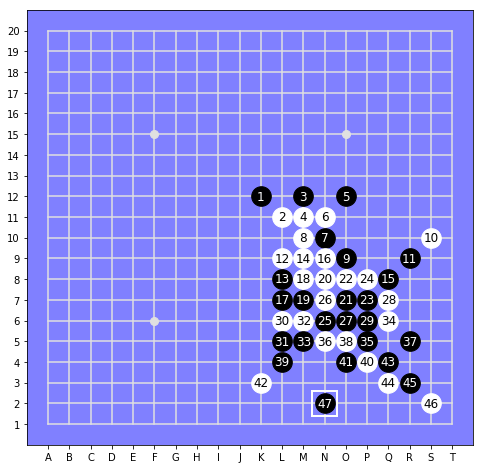

In [144]:
board = GomokuBoard(heuristics, N, disp_width=8, stones=stones)
board.display()

# Verify qvalues from file

In [145]:
from QFunction import heuristic_QF

In [146]:
policy = HeuristicGomokuPolicy(board, style=2)

In [147]:
qvalue = heuristic_QF(board, policy)
qvalue = qvalue[0].astype(np.float32)

In [148]:
from_file = q[idx].reshape(N_p, N_p)[1:-1].T[1:-1].T

In [149]:
(qvalue == from_file).all()

True